In [223]:
import numpy as np
import matplotlib.pyplot as plt

In [235]:
N = 100
sigma = 15
x = np.linspace(0, N, N+1) + 20
y = 2 * x + np.random.normal(0,sigma,N+1)

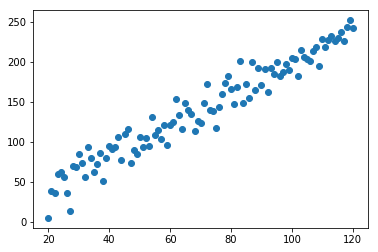

In [236]:

plt.plot(x,y,'o')

### least square
given tx (N, D+1) and y (N), finds the solution in terms of the lest squares, namely $arg min_{b} || Y - XB ||^2$
which is $B = (X^T X)^{-1} (X^T Y)$

In [237]:
def least_squares(tx, y):
    XT_X = tx.T @ tx
    XT_Y = tx.T @ y
    w = np.linalg.inv(XT_X) @ XT_Y
    loss = least_square_loss(tx, y, w)
    return w, loss

In [238]:
def least_square_loss(tx, y, w):
    e = y - tx @ w.T
    return (1/y.shape[0]) * e @ e.T

### ridge regression
given tx (N, D+1), lamdba and y (N), finds the solution in terms of the lest squares, namely $arg min_{b} || Y - XB ||^2 + \lambda ||B||^2$
which is $B = (X^T X + \lambda I_{D+1})^{-1} (X^T Y)$

In [239]:
def ridge_regression(tx, y, lambda_):
    XT_X = tx.T @ tx
    XT_Y = tx.T @ y
    w = np.linalg.inv(XT_X + np.eye(tx.shape[1]) * lambda_) @ XT_Y
    loss = ridge_regression_loss(tx, y, w, lambda_)
    return w, loss

In [240]:
def ridge_regression_loss(tx, y, w, lambda_):
    return least_square_loss(tx, y, w) + lambda_ * w.T @ w

In [241]:
def predict(x, w):
    return tx @ w

In [242]:
tx = np.vstack((np.ones(N+1), x)).T

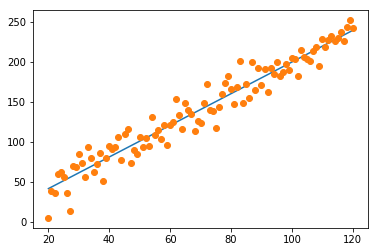

In [243]:
w_ls, loss = least_squares(tx, y)
pred = predict(x,w_ls)
plt.plot(x, pred)
plt.plot(x,y,'o')

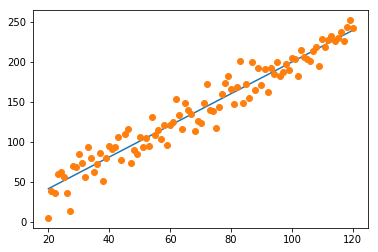

In [244]:
lambda_ = 1
w_rr, loss = ridge_regression(tx, y, lambda_)
pred = predict(x, w_rr)
plt.plot(x, pred)
plt.plot(x,y,'o')